In [1]:
from z3 import *
import numpy as np
import re
import arviz as az
import pandas as pd
import itertools
import random
import operator # TODO: check this library
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../../"))

from src.mcmc_sat import smt, mcmc, sat, utils

In [2]:
#32 Haplotypes
#5 placings in the haplotype (2⁵ = 32)
#100 genotypes

haplotypes = list(map(list, itertools.product([0, 1], repeat=5)))
haplotypesProb = [
    0.0056,   0.004,                0.00368,  0.1,                 
    0.005681, 0.09,                 0.00468,  0.003,    
    0.08,     0.006147,             0.00595,  0.0071,   
    0.00345,  0.00632,              0.1,      0.0029,   
    0.0071,   0.006147,             0.085,    0.0045671,
    0.003379, 0.1,                  0.00461,  0.00614,             
    0.075,    0.08,                 0.00761,  0.004321, 
    0.09,     0.009217900000000112, 0.0134,   0.075]

haplotypes_prob_synth = [
    0.00100000000000000, 0.00100000000000000, 0.00100000000000000, 0.00100000000000000,
    0.00100000000000000, 0.32366666666666666, 0.00100000000000000, 0.00100000000000000,
    0.00100000000000000, 0.00100000000000000, 0.00100000000000000, 0.00100000000000000,   
    0.00100000000000000, 0.00100000000000000, 0.00100000000000000, 0.00100000000000000,
    0.00100000000000000, 0.00100000000000000, 0.32366666666666666, 0.00100000000000000,
    0.00100000000000000, 0.00100000000000000, 0.00100000000000000, 0.00100000000000000,
    0.00100000000000000, 0.00100000000000000, 0.00100000000000000, 0.00100000000000000,
    0.00100000000000000, 0.00100000000000000, 0.00100000000000000, 0.32366666666666666
]

In [3]:
# NOTE: We try a simpler version of the problem with all probability
# mass concentrated in 3 haplotypes
haplotypesProb=haplotypes_prob_synth

In [4]:
# NOTE: This is a dict to store the number of haplotypes drawn from the probabilities above
haplotypesnumber = {}
for i in range(32):
    haplotypesnumber[str(haplotypes[i])] = 0

In [5]:
# NOTE: This code snippet samples 100 genotypes by sampling haplotypes with the probabilities above
#       I suppose the goal is to recover the probabilities above
genotypes = []
d = {'h_1': [], 'h_2': [], 'g': []} # NOTE: added by Raúl
# seeds not working...
np.random.seed(2023)
random.seed(2023)
for i in range(100):
    h1 = np.random.choice(np.arange(32), p=haplotypesProb) # samples one haplotype (from 0 to 31) with probabilities above
    h2 = np.random.choice(np.arange(32), p=haplotypesProb) # samples one haplotype (from 0 to 31) with probabilities above
    genotypes.append(list(map(operator.add,haplotypes[h1],haplotypes[h2]))) # combines them to form a genotype
    d['h_1'].append(haplotypes[h1]); d['h_2'].append(haplotypes[h2]); d['g'].append(genotypes[i]); # NOTE: added by Raúl
    haplotypesnumber[str(haplotypes[h1])] = haplotypesnumber[str(haplotypes[h1])] +1 # keeps count of sampled haplotypes 
    haplotypesnumber[str(haplotypes[h2])] = haplotypesnumber[str(haplotypes[h2])] +1 # keeps count of sampled haplotypes 
df = pd.DataFrame(data=d)

In [6]:
df

,h_1,h_2,g
0,"[0, 0, 1, 0, 1]","[1, 1, 1, 1, 1]","[1, 1, 2, 1, 2]"
1,"[1, 0, 0, 1, 0]","[0, 0, 1, 0, 1]","[1, 0, 1, 1, 1]"
2,"[0, 0, 1, 0, 1]","[1, 0, 0, 1, 0]","[1, 0, 1, 1, 1]"
3,"[0, 0, 1, 0, 1]","[1, 1, 1, 1, 1]","[1, 1, 2, 1, 2]"
4,"[1, 0, 0, 1, 0]","[1, 0, 0, 1, 0]","[2, 0, 0, 2, 0]"
...,...,...,...
95,"[0, 0, 1, 0, 1]","[0, 0, 1, 0, 1]","[0, 0, 2, 0, 2]"
96,"[1, 1, 1, 1, 1]","[1, 1, 1, 1, 1]","[2, 2, 2, 2, 2]"
97,"[1, 1, 1, 1, 1]","[1, 1, 1, 1, 1]","[2, 2, 2, 2, 2]"
98,"[1, 0, 0, 1, 0]","[1, 1, 1, 1, 1]","[2, 1, 1, 2, 1]"


In [7]:
haplotypesnumber

{'[0, 0, 0, 0, 0]': 0,
 '[0, 0, 0, 0, 1]': 0,
 '[0, 0, 0, 1, 0]': 0,
 '[0, 0, 0, 1, 1]': 0,
 '[0, 0, 1, 0, 0]': 0,
 '[0, 0, 1, 0, 1]': 57,
 '[0, 0, 1, 1, 0]': 0,
 '[0, 0, 1, 1, 1]': 0,
 '[0, 1, 0, 0, 0]': 1,
 '[0, 1, 0, 0, 1]': 1,
 '[0, 1, 0, 1, 0]': 0,
 '[0, 1, 0, 1, 1]': 0,
 '[0, 1, 1, 0, 0]': 0,
 '[0, 1, 1, 0, 1]': 0,
 '[0, 1, 1, 1, 0]': 0,
 '[0, 1, 1, 1, 1]': 2,
 '[1, 0, 0, 0, 0]': 1,
 '[1, 0, 0, 0, 1]': 0,
 '[1, 0, 0, 1, 0]': 71,
 '[1, 0, 0, 1, 1]': 0,
 '[1, 0, 1, 0, 0]': 0,
 '[1, 0, 1, 0, 1]': 0,
 '[1, 0, 1, 1, 0]': 0,
 '[1, 0, 1, 1, 1]': 0,
 '[1, 1, 0, 0, 0]': 0,
 '[1, 1, 0, 0, 1]': 0,
 '[1, 1, 0, 1, 0]': 1,
 '[1, 1, 0, 1, 1]': 1,
 '[1, 1, 1, 0, 0]': 0,
 '[1, 1, 1, 0, 1]': 0,
 '[1, 1, 1, 1, 0]': 1,
 '[1, 1, 1, 1, 1]': 64}

In [8]:
# Assumption, all bit-vectors are of the same size
num_bits = 2
num_vars = 5*100*2
var_list = [BitVec(f'x{i}',num_bits) for i in range(num_vars)]
x = var_list
g = Goal()
sat.add_bool_vars_to_goal(g, var_list)

#Add contraints
for i in range(num_vars):
    g.add(ULE(x[i],1)) # Each BitVec is in {0,1}

for i in range(100): # iterate over all genotypes
    for j in range(5): # iterate over all bits of the BitVec
        g.add(x[i*10+j] + x[i*10+j+5] == genotypes[i][j])

In [9]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='cmsgen',
                                           z3_problem=g,
                                           num_vars=num_vars,
                                           num_bits=num_bits,
                                           num_samples=10000,
                                           num_chains=4)

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 00791438b32bb387e1f6ba7c1b211d7f6595aa06
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -fno-stack-protector -mtune=native -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DNDEBUG -D_FORTIFY_SOURCE=0 -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = ON | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING = ON | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = OFF | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 9.4.0
c executed with command line: cmsgen --samples 10000 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samples to file: cmsgen_input/cmsgen_samples.out
c Number of samples found until now:     10
c Number of samples found until now:     20
c Number of samples found until now:     30
c Number of samples fo

c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430
c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470
c Number of samples found until now:    480
c Number of samples found until now:    490
c Number of samples found until now:    500
c Number of samples found until now:    510
c Number of samples found until now:    520
c Number of samples found until now:    530
c Number of samples found until now:    540
c Number of samples found until now:    550
c Number of samples found until now:    560
c Number of samples found until now:    570
c Number of samples found until now:    580
c Number of samples found until now:    590
c Number of samples found until now:    600
c Number of samples found until now:    610
c Number of samples found until now:    620
c Number of samples found until 

c Number of samples found until now:    850
c Number of samples found until now:    860
c Number of samples found until now:    870
c Number of samples found until now:    880
c Number of samples found until now:    890
c Number of samples found until now:    900
c Number of samples found until now:    910
c Number of samples found until now:    920
c Number of samples found until now:    930
c Number of samples found until now:    940
c Number of samples found until now:    950
c Number of samples found until now:    960
c Number of samples found until now:    970
c Number of samples found until now:    980
c Number of samples found until now:    990
c Number of samples found until now:   1000
c Number of samples found until now:   1010
c Number of samples found until now:   1020
c Number of samples found until now:   1030
c Number of samples found until now:   1040
c Number of samples found until now:   1050
c Number of samples found until now:   1060
c Number of samples found until 

c Number of samples found until now:   1340
c Number of samples found until now:   1350
c Number of samples found until now:   1360
c Number of samples found until now:   1370
c Number of samples found until now:   1380
c Number of samples found until now:   1390
c Number of samples found until now:   1400
c Number of samples found until now:   1410
c Number of samples found until now:   1420
c Number of samples found until now:   1430
c Number of samples found until now:   1440
c Number of samples found until now:   1450
c Number of samples found until now:   1460
c Number of samples found until now:   1470
c Number of samples found until now:   1480
c Number of samples found until now:   1490
c Number of samples found until now:   1500
c Number of samples found until now:   1510
c Number of samples found until now:   1520
c Number of samples found until now:   1530
c Number of samples found until now:   1540
c Number of samples found until now:   1550
c Number of samples found until 

c Number of samples found until now:   1820
c Number of samples found until now:   1830
c Number of samples found until now:   1840
c Number of samples found until now:   1850
c Number of samples found until now:   1860
c Number of samples found until now:   1870
c Number of samples found until now:   1880
c Number of samples found until now:   1890
c Number of samples found until now:   1900
c Number of samples found until now:   1910
c Number of samples found until now:   1920
c Number of samples found until now:   1930
c Number of samples found until now:   1940
c Number of samples found until now:   1950
c Number of samples found until now:   1960
c Number of samples found until now:   1970
c Number of samples found until now:   1980
c Number of samples found until now:   1990
c Number of samples found until now:   2000
c Number of samples found until now:   2010
c Number of samples found until now:   2020
c Number of samples found until now:   2030
c Number of samples found until 

c Number of samples found until now:   2310
c Number of samples found until now:   2320
c Number of samples found until now:   2330
c Number of samples found until now:   2340
c Number of samples found until now:   2350
c Number of samples found until now:   2360
c Number of samples found until now:   2370
c Number of samples found until now:   2380
c Number of samples found until now:   2390
c Number of samples found until now:   2400
c Number of samples found until now:   2410
c Number of samples found until now:   2420
c Number of samples found until now:   2430
c Number of samples found until now:   2440
c Number of samples found until now:   2450
c Number of samples found until now:   2460
c Number of samples found until now:   2470
c Number of samples found until now:   2480
c Number of samples found until now:   2490
c Number of samples found until now:   2500
c Number of samples found until now:   2510
c Number of samples found until now:   2520
c Number of samples found until 

c Number of samples found until now:   2770
c Number of samples found until now:   2780
c Number of samples found until now:   2790
c Number of samples found until now:   2800
c Number of samples found until now:   2810
c Number of samples found until now:   2820
c Number of samples found until now:   2830
c Number of samples found until now:   2840
c Number of samples found until now:   2850
c Number of samples found until now:   2860
c Number of samples found until now:   2870
c Number of samples found until now:   2880
c Number of samples found until now:   2890
c Number of samples found until now:   2900
c Number of samples found until now:   2910
c Number of samples found until now:   2920
c Number of samples found until now:   2930
c Number of samples found until now:   2940
c Number of samples found until now:   2950
c Number of samples found until now:   2960
c Number of samples found until now:   2970
c Number of samples found until now:   2980
c Number of samples found until 

c Number of samples found until now:   3260
c Number of samples found until now:   3270
c Number of samples found until now:   3280
c Number of samples found until now:   3290
c Number of samples found until now:   3300
c Number of samples found until now:   3310
c Number of samples found until now:   3320
c Number of samples found until now:   3330
c Number of samples found until now:   3340
c Number of samples found until now:   3350
c Number of samples found until now:   3360
c Number of samples found until now:   3370
c Number of samples found until now:   3380
c Number of samples found until now:   3390
c Number of samples found until now:   3400
c Number of samples found until now:   3410
c Number of samples found until now:   3420
c Number of samples found until now:   3430
c Number of samples found until now:   3440
c Number of samples found until now:   3450
c Number of samples found until now:   3460
c Number of samples found until now:   3470
c Number of samples found until 

c Number of samples found until now:   3750
c Number of samples found until now:   3760
c Number of samples found until now:   3770
c Number of samples found until now:   3780
c Number of samples found until now:   3790
c Number of samples found until now:   3800
c Number of samples found until now:   3810
c Number of samples found until now:   3820
c Number of samples found until now:   3830
c Number of samples found until now:   3840
c Number of samples found until now:   3850
c Number of samples found until now:   3860
c Number of samples found until now:   3870
c Number of samples found until now:   3880
c Number of samples found until now:   3890
c Number of samples found until now:   3900
c Number of samples found until now:   3910
c Number of samples found until now:   3920
c Number of samples found until now:   3930
c Number of samples found until now:   3940
c Number of samples found until now:   3950
c Number of samples found until now:   3960
c Number of samples found until 

c Number of samples found until now:   4240
c Number of samples found until now:   4250
c Number of samples found until now:   4260
c Number of samples found until now:   4270
c Number of samples found until now:   4280
c Number of samples found until now:   4290
c Number of samples found until now:   4300
c Number of samples found until now:   4310
c Number of samples found until now:   4320
c Number of samples found until now:   4330
c Number of samples found until now:   4340
c Number of samples found until now:   4350
c Number of samples found until now:   4360
c Number of samples found until now:   4370
c Number of samples found until now:   4380
c Number of samples found until now:   4390
c Number of samples found until now:   4400
c Number of samples found until now:   4410
c Number of samples found until now:   4420
c Number of samples found until now:   4430
c Number of samples found until now:   4440
c Number of samples found until now:   4450
c Number of samples found until 

c Number of samples found until now:   4730
c Number of samples found until now:   4740
c Number of samples found until now:   4750
c Number of samples found until now:   4760
c Number of samples found until now:   4770
c Number of samples found until now:   4780
c Number of samples found until now:   4790
c Number of samples found until now:   4800
c Number of samples found until now:   4810
c Number of samples found until now:   4820
c Number of samples found until now:   4830
c Number of samples found until now:   4840
c Number of samples found until now:   4850
c Number of samples found until now:   4860
c Number of samples found until now:   4870
c Number of samples found until now:   4880
c Number of samples found until now:   4890
c Number of samples found until now:   4900
c Number of samples found until now:   4910
c Number of samples found until now:   4920
c Number of samples found until now:   4930
c Number of samples found until now:   4940
c Number of samples found until 

c Number of samples found until now:   5220
c Number of samples found until now:   5230
c Number of samples found until now:   5240
c Number of samples found until now:   5250
c Number of samples found until now:   5260
c Number of samples found until now:   5270
c Number of samples found until now:   5280
c Number of samples found until now:   5290
c Number of samples found until now:   5300
c Number of samples found until now:   5310
c Number of samples found until now:   5320
c Number of samples found until now:   5330
c Number of samples found until now:   5340
c Number of samples found until now:   5350
c Number of samples found until now:   5360
c Number of samples found until now:   5370
c Number of samples found until now:   5380
c Number of samples found until now:   5390
c Number of samples found until now:   5400
c Number of samples found until now:   5410
c Number of samples found until now:   5420
c Number of samples found until now:   5430
c Number of samples found until 

c Number of samples found until now:   5700
c Number of samples found until now:   5710
c Number of samples found until now:   5720
c Number of samples found until now:   5730
c Number of samples found until now:   5740
c Number of samples found until now:   5750
c Number of samples found until now:   5760
c Number of samples found until now:   5770
c Number of samples found until now:   5780
c Number of samples found until now:   5790
c Number of samples found until now:   5800
c Number of samples found until now:   5810
c Number of samples found until now:   5820
c Number of samples found until now:   5830
c Number of samples found until now:   5840
c Number of samples found until now:   5850
c Number of samples found until now:   5860
c Number of samples found until now:   5870
c Number of samples found until now:   5880
c Number of samples found until now:   5890
c Number of samples found until now:   5900
c Number of samples found until now:   5910
c Number of samples found until 

c Number of samples found until now:   6190
c Number of samples found until now:   6200
c Number of samples found until now:   6210
c Number of samples found until now:   6220
c Number of samples found until now:   6230
c Number of samples found until now:   6240
c Number of samples found until now:   6250
c Number of samples found until now:   6260
c Number of samples found until now:   6270
c Number of samples found until now:   6280
c Number of samples found until now:   6290
c Number of samples found until now:   6300
c Number of samples found until now:   6310
c Number of samples found until now:   6320
c Number of samples found until now:   6330
c Number of samples found until now:   6340
c Number of samples found until now:   6350
c Number of samples found until now:   6360
c Number of samples found until now:   6370
c Number of samples found until now:   6380
c Number of samples found until now:   6390
c Number of samples found until now:   6400
c Number of samples found until 

c Number of samples found until now:   6670
c Number of samples found until now:   6680
c Number of samples found until now:   6690
c Number of samples found until now:   6700
c Number of samples found until now:   6710
c Number of samples found until now:   6720
c Number of samples found until now:   6730
c Number of samples found until now:   6740
c Number of samples found until now:   6750
c Number of samples found until now:   6760
c Number of samples found until now:   6770
c Number of samples found until now:   6780
c Number of samples found until now:   6790
c Number of samples found until now:   6800
c Number of samples found until now:   6810
c Number of samples found until now:   6820
c Number of samples found until now:   6830
c Number of samples found until now:   6840
c Number of samples found until now:   6850
c Number of samples found until now:   6860
c Number of samples found until now:   6870
c Number of samples found until now:   6880
c Number of samples found until 

c Number of samples found until now:   7160
c Number of samples found until now:   7170
c Number of samples found until now:   7180
c Number of samples found until now:   7190
c Number of samples found until now:   7200
c Number of samples found until now:   7210
c Number of samples found until now:   7220
c Number of samples found until now:   7230
c Number of samples found until now:   7240
c Number of samples found until now:   7250
c Number of samples found until now:   7260
c Number of samples found until now:   7270
c Number of samples found until now:   7280
c Number of samples found until now:   7290
c Number of samples found until now:   7300
c Number of samples found until now:   7310
c Number of samples found until now:   7320
c Number of samples found until now:   7330
c Number of samples found until now:   7340
c Number of samples found until now:   7350
c Number of samples found until now:   7360
c Number of samples found until now:   7370
c Number of samples found until 

c Number of samples found until now:   7640
c Number of samples found until now:   7650
c Number of samples found until now:   7660
c Number of samples found until now:   7670
c Number of samples found until now:   7680
c Number of samples found until now:   7690
c Number of samples found until now:   7700
c Number of samples found until now:   7710
c Number of samples found until now:   7720
c Number of samples found until now:   7730
c Number of samples found until now:   7740
c Number of samples found until now:   7750
c Number of samples found until now:   7760
c Number of samples found until now:   7770
c Number of samples found until now:   7780
c Number of samples found until now:   7790
c Number of samples found until now:   7800
c Number of samples found until now:   7810
c Number of samples found until now:   7820
c Number of samples found until now:   7830
c Number of samples found until now:   7840
c Number of samples found until now:   7850
c Number of samples found until 

c Number of samples found until now:   8120
c Number of samples found until now:   8130
c Number of samples found until now:   8140
c Number of samples found until now:   8150
c Number of samples found until now:   8160
c Number of samples found until now:   8170
c Number of samples found until now:   8180
c Number of samples found until now:   8190
c Number of samples found until now:   8200
c Number of samples found until now:   8210
c Number of samples found until now:   8220
c Number of samples found until now:   8230
c Number of samples found until now:   8240
c Number of samples found until now:   8250
c Number of samples found until now:   8260
c Number of samples found until now:   8270
c Number of samples found until now:   8280
c Number of samples found until now:   8290
c Number of samples found until now:   8300
c Number of samples found until now:   8310
c Number of samples found until now:   8320
c Number of samples found until now:   8330
c Number of samples found until 

c Number of samples found until now:   8610
c Number of samples found until now:   8620
c Number of samples found until now:   8630
c Number of samples found until now:   8640
c Number of samples found until now:   8650
c Number of samples found until now:   8660
c Number of samples found until now:   8670
c Number of samples found until now:   8680
c Number of samples found until now:   8690
c Number of samples found until now:   8700
c Number of samples found until now:   8710
c Number of samples found until now:   8720
c Number of samples found until now:   8730
c Number of samples found until now:   8740
c Number of samples found until now:   8750
c Number of samples found until now:   8760
c Number of samples found until now:   8770
c Number of samples found until now:   8780
c Number of samples found until now:   8790
c Number of samples found until now:   8800
c Number of samples found until now:   8810
c Number of samples found until now:   8820
c Number of samples found until 

c Number of samples found until now:   9090
c Number of samples found until now:   9100
c Number of samples found until now:   9110
c Number of samples found until now:   9120
c Number of samples found until now:   9130
c Number of samples found until now:   9140
c Number of samples found until now:   9150
c Number of samples found until now:   9160
c Number of samples found until now:   9170
c Number of samples found until now:   9180
c Number of samples found until now:   9190
c Number of samples found until now:   9200
c Number of samples found until now:   9210
c Number of samples found until now:   9220
c Number of samples found until now:   9230
c Number of samples found until now:   9240
c Number of samples found until now:   9250
c Number of samples found until now:   9260
c Number of samples found until now:   9270
c Number of samples found until now:   9280
c Number of samples found until now:   9290
c Number of samples found until now:   9300
c Number of samples found until 

c Number of samples found until now:   9550
c Number of samples found until now:   9560
c Number of samples found until now:   9570
c Number of samples found until now:   9580
c Number of samples found until now:   9590
c Number of samples found until now:   9600
c Number of samples found until now:   9610
c Number of samples found until now:   9620
c Number of samples found until now:   9630
c Number of samples found until now:   9640
c Number of samples found until now:   9650
c Number of samples found until now:   9660
c Number of samples found until now:   9670
c Number of samples found until now:   9680
c Number of samples found until now:   9690
c Number of samples found until now:   9700
c Number of samples found until now:   9710
c Number of samples found until now:   9720
c Number of samples found until now:   9730
c Number of samples found until now:   9740
c Number of samples found until now:   9750
c Number of samples found until now:   9760
c Number of samples found until 

TODO: Determine the right queries for the posterior

We should determine the probability of each haplotype?

Or should we retreive the invidivual haplotypes for each record?

In [10]:
var_names= ['x0','x1','x2','x3','x4']
trace.posterior[var_names].sel(chain=3,draw=range(30000-10,30000))

KeyError: "not all values found in index 'draw'"

In [11]:
haplo_var_vectors = [[f'x{i+j}' for j in range(5) ] for i in np.arange(0,num_vars,step=5)]
haplo_var_vectors

[['x0', 'x1', 'x2', 'x3', 'x4'],
 ['x5', 'x6', 'x7', 'x8', 'x9'],
 ['x10', 'x11', 'x12', 'x13', 'x14'],
 ['x15', 'x16', 'x17', 'x18', 'x19'],
 ['x20', 'x21', 'x22', 'x23', 'x24'],
 ['x25', 'x26', 'x27', 'x28', 'x29'],
 ['x30', 'x31', 'x32', 'x33', 'x34'],
 ['x35', 'x36', 'x37', 'x38', 'x39'],
 ['x40', 'x41', 'x42', 'x43', 'x44'],
 ['x45', 'x46', 'x47', 'x48', 'x49'],
 ['x50', 'x51', 'x52', 'x53', 'x54'],
 ['x55', 'x56', 'x57', 'x58', 'x59'],
 ['x60', 'x61', 'x62', 'x63', 'x64'],
 ['x65', 'x66', 'x67', 'x68', 'x69'],
 ['x70', 'x71', 'x72', 'x73', 'x74'],
 ['x75', 'x76', 'x77', 'x78', 'x79'],
 ['x80', 'x81', 'x82', 'x83', 'x84'],
 ['x85', 'x86', 'x87', 'x88', 'x89'],
 ['x90', 'x91', 'x92', 'x93', 'x94'],
 ['x95', 'x96', 'x97', 'x98', 'x99'],
 ['x100', 'x101', 'x102', 'x103', 'x104'],
 ['x105', 'x106', 'x107', 'x108', 'x109'],
 ['x110', 'x111', 'x112', 'x113', 'x114'],
 ['x115', 'x116', 'x117', 'x118', 'x119'],
 ['x120', 'x121', 'x122', 'x123', 'x124'],
 ['x125', 'x126', 'x127', 'x128', '

In [12]:
def __get_distinct_haplotype_counts(trace, var_names: list[str]):
    """
    Returns the count of each distinct sampled haplotype for the Bitvector specified by the variables in `var_names`
    Note: Try to reimplement this function more efficiently. The bottleneck seem to be the casting of integer lists to str
    """
    return np.unique(np.array([str(a).replace(" ", ", ") for a in trace.posterior[var_names].to_array().values.reshape(5,-1).T]), return_counts=True)

def get_count_haplotypes(trace, num_vars, haplotypes):
    """
    Returns a dictionary where keys are haplotypes and values are the counts of each haplotype in the trace.
    Note: It is computationally expensive due to the function `__get_distinct_haplotype_counts`.
    """
    # list of lists where each list contains the variables for each BitVector (to be used as indexes in the posterior trace)
    haplo_var_vectors = [[f'x{i+j}' for j in range(5) ] for i in np.arange(0,num_vars,step=5)]
    # list of pairs where the first element in each pair is list with
    # each distinct haplotype, and the second pair element is a list
    # with the counts of the corresponding haplotype
    counts_per_var_vector = [__get_distinct_haplotype_counts(trace, haplo_var_vector) for haplo_var_vector in haplo_var_vectors]
    # initilize a dict with distinct haplotypes as keys and values are counts of each haplotype (initially 0)
    haplotypesnumber_posterior = { str(haplotypes[i]): 0 for i in range(32) }
    # iterate over all haplotype counts for each BitVector, and add them to the dictionary above
    for i in counts_per_var_vector:
        num_distinct_haplotypes = len(i[0])
        for j in range(num_distinct_haplotypes):
            haplotypesnumber_posterior[i[0][j]] += i[1][j]
    # return dictionary with all counts
    return haplotypesnumber_posterior

In [13]:
haplotypesnumber_posterior = get_count_haplotypes(trace, num_vars, haplotypes)

In [14]:
## Data from previous run

# haplotypesnumber_posterior = {
#  '[0, 0, 0, 0, 0]': 247004,
#  '[0, 0, 0, 0, 1]': 607128,
#  '[0, 0, 0, 1, 0]': 307620,
#  '[0, 0, 0, 1, 1]': 818288,
#  '[0, 0, 1, 0, 0]': 412276,
#  '[0, 0, 1, 0, 1]': 1103424,
#  '[0, 0, 1, 1, 0]': 472740,
#  '[0, 0, 1, 1, 1]': 713544,
#  '[0, 1, 0, 0, 0]': 653180,
#  '[0, 1, 0, 0, 1]': 381460,
#  '[0, 1, 0, 1, 0]': 594260,
#  '[0, 1, 0, 1, 1]': 411860,
#  '[0, 1, 1, 0, 0]': 878104,
#  '[0, 1, 1, 0, 1]': 577520,
#  '[0, 1, 1, 1, 0]': 1294472,
#  '[0, 1, 1, 1, 1]': 727120,
#  '[1, 0, 0, 0, 0]': 759108,
#  '[1, 0, 0, 0, 1]': 578796,
#  '[1, 0, 0, 1, 0]': 1208096,
#  '[1, 0, 0, 1, 1]': 335244,
#  '[1, 0, 1, 0, 0]': 619504,
#  '[1, 0, 1, 0, 1]': 1373360,
#  '[1, 0, 1, 1, 0]': 411388,
#  '[1, 0, 1, 1, 1]': 352480,
#  '[1, 1, 0, 0, 0]': 1760908,
#  '[1, 1, 0, 0, 1]': 1373004,
#  '[1, 1, 0, 1, 0]': 531760,
#  '[1, 1, 0, 1, 1]': 472284,
#  '[1, 1, 1, 0, 0]': 1449520,
#  '[1, 1, 1, 0, 1]': 905704,
#  '[1, 1, 1, 1, 0]': 760060,
#  '[1, 1, 1, 1, 1]': 908784
#}

In [15]:
def normalize_haplotypes_posterior(haplo_num_posterior):
    """
    Takes as input a dict with haplotypes as keys and their counts and values.
    Returns a similar dict where values is the probability of each haplotype (frequentist)
    """
    total = sum([haplo_num_posterior[x] for x in list(haplo_num_posterior.keys())])
    return { x: haplo_num_posterior[x]/total  for x in list(haplo_num_posterior.keys())}

In [16]:
c = normalize_haplotypes_posterior(haplotypesnumber_posterior)
d = normalize_haplotypes_posterior(haplotypesnumber)

In [17]:
posterior_probs = [c[k] for k in c.keys()]
posterior_probs_sample = [d[k] for k in d.keys()]

In [18]:
df_p = pd.DataFrame(data={'MCMC+SAT': posterior_probs, 'population': haplotypesProb, 'sample': posterior_probs_sample})

In [19]:
df_p

,MCMC+SAT,population,sample
0,0.017056,0.001000,0.000
1,0.016931,0.001000,0.000
2,0.014327,0.001000,0.000
3,0.014214,0.001000,0.000
4,0.016230,0.001000,0.000
5,0.118786,0.323667,0.285
6,0.013668,0.001000,0.000
7,0.036205,0.001000,0.000
8,0.001898,0.001000,0.005
9,0.001867,0.001000,0.005


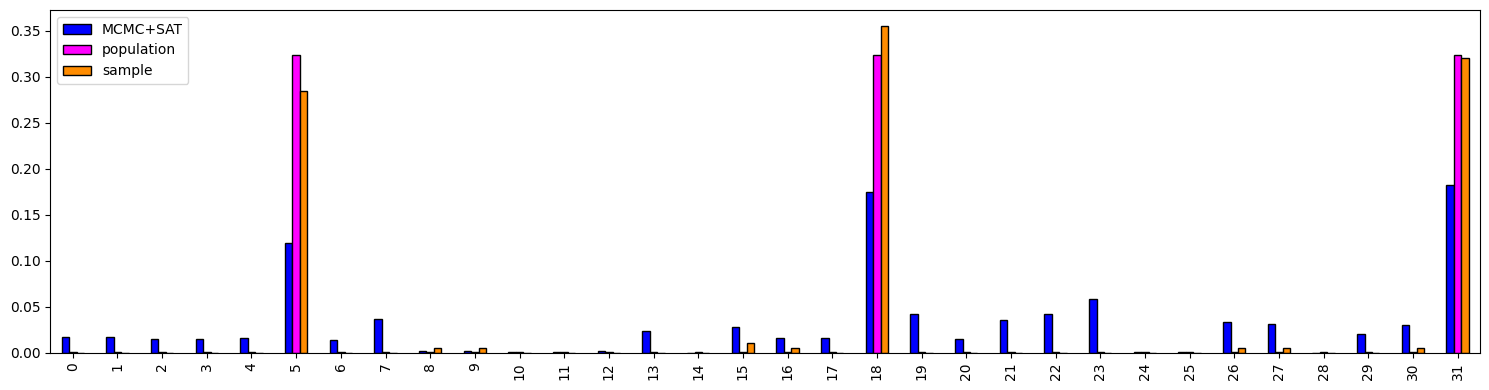

In [20]:
df_p.plot.bar(figsize=(15,4), color=['blue', 'fuchsia', 'darkorange'], edgecolor='black');
plt.savefig('haplo_mcmc_sat.png',dpi=150);

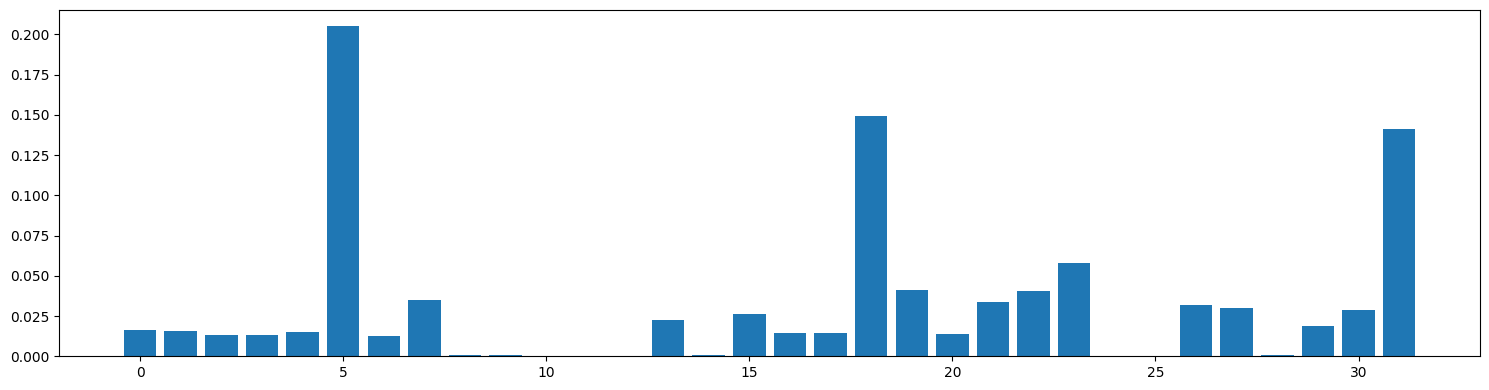

In [21]:
# comparing haplotype probabilities with original
fig, ax = plt.subplots(1,figsize=(15,4))
ax.bar(range(32), [abs(posterior_probs[i] - haplotypesProb[i]) for i in range(len(haplotypesProb))]);

In [22]:
[abs(posterior_probs[i] - haplotypesProb[i]) for i in range(len(haplotypesProb))]

[0.016056499999999998,
 0.015931,
 0.013326999999999999,
 0.0132135,
 0.01523,
 0.20488066666666666,
 0.012667999999999999,
 0.035205,
 0.0008975000000000001,
 0.0008665000000000001,
 0.00038200000000000007,
 0.000339,
 0.0002444999999999999,
 0.022720499999999998,
 0.001,
 0.026574999999999998,
 0.014651999999999998,
 0.0145175,
 0.14920916666666667,
 0.0408935,
 0.013864499999999998,
 0.034007499999999996,
 0.040396,
 0.0577945,
 0.00040550000000000004,
 0.0003595,
 0.031976,
 0.029697499999999998,
 0.001,
 0.018990999999999997,
 0.029018,
 0.14116716666666665]

An attempt to use the posterior distribution to draw conclusions

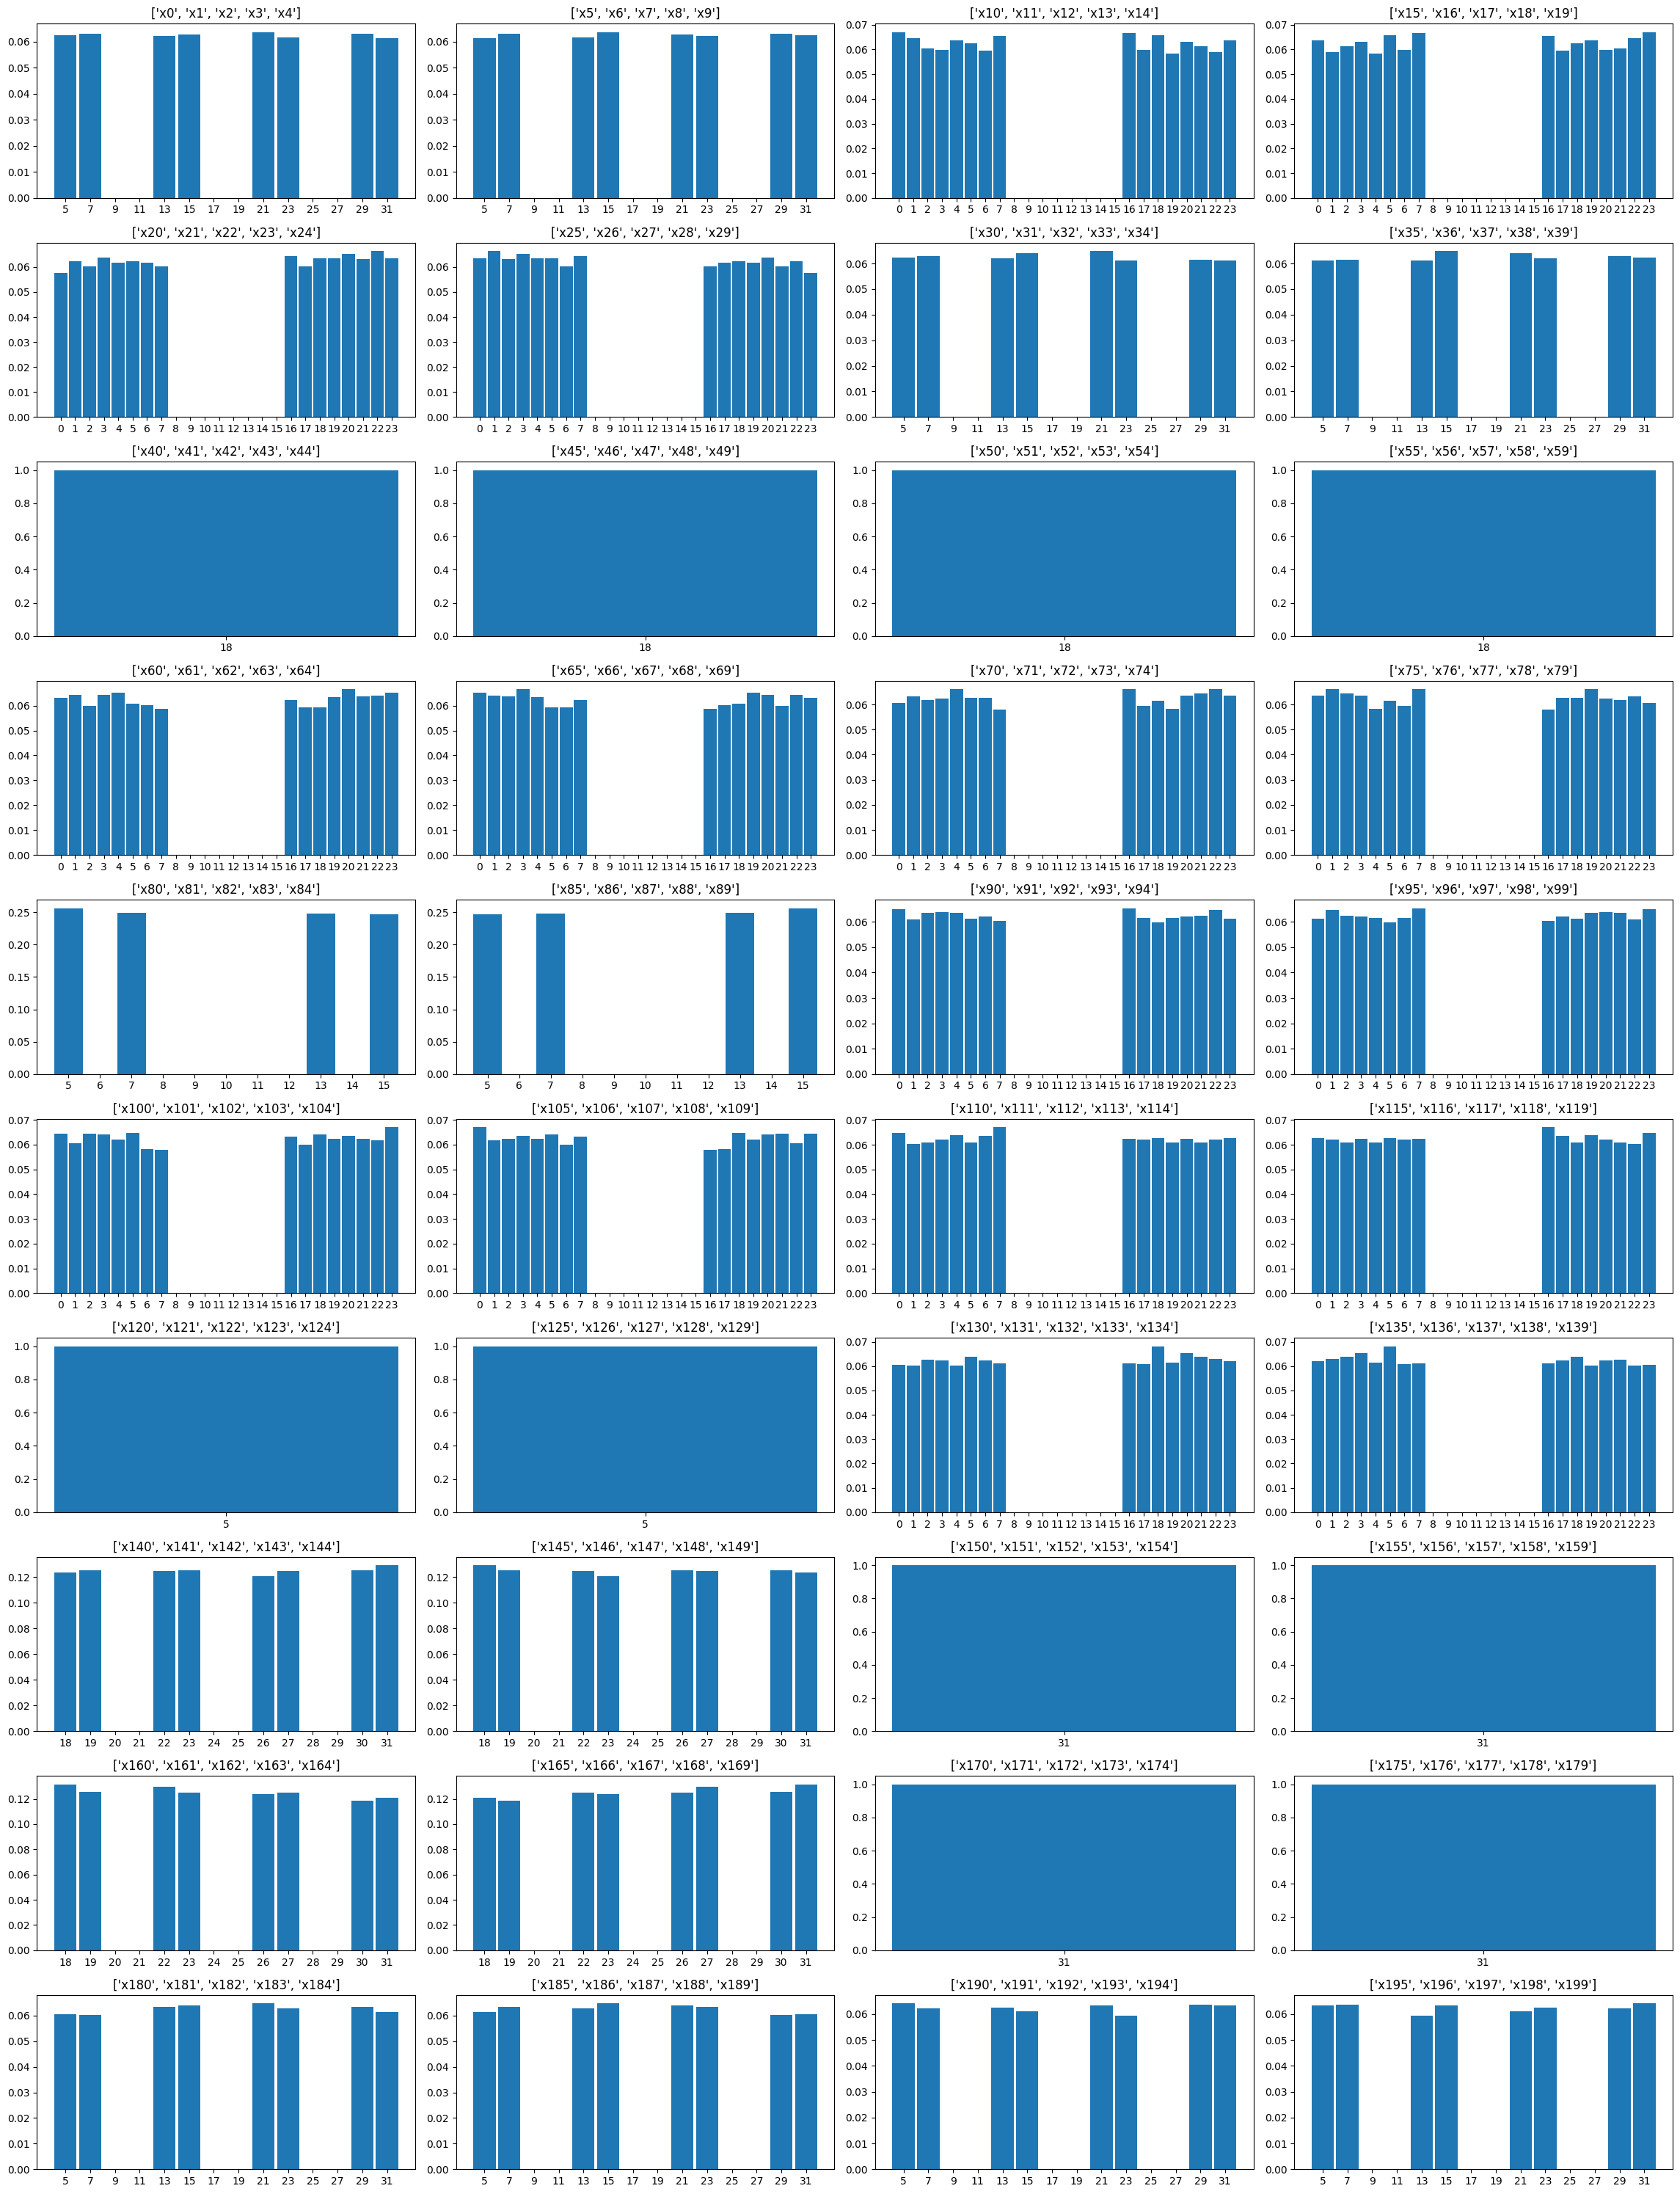

In [23]:
plot_posterior_haplotype = lambda var_names, ax: az.plot_dist(np.array(list(map(lambda x: int("".join(str(y) for y in x),2),trace.posterior[var_names].to_array().values.reshape(5,-1).T))),ax=ax)

num_vars = 200
num_haplotype_vars = int(num_vars/5)
num_rows = int(num_haplotype_vars/4)
size_y   = 3*num_rows

fig, axs_m = plt.subplots(nrows=num_rows, ncols=4, figsize=(23,size_y))
axs = axs_m.ravel()
for i in np.arange(0,num_vars,step=5):
    var_names = [f'x{i+j}' for j in range(5)]
    ax = axs[int(i/5)]
    plot_posterior_haplotype(var_names, ax=ax)
    ax.set_title(var_names)
# plt.tight_layout();
plt.savefig('posterior_haplotypes.png',dpi=150);
plt.show();

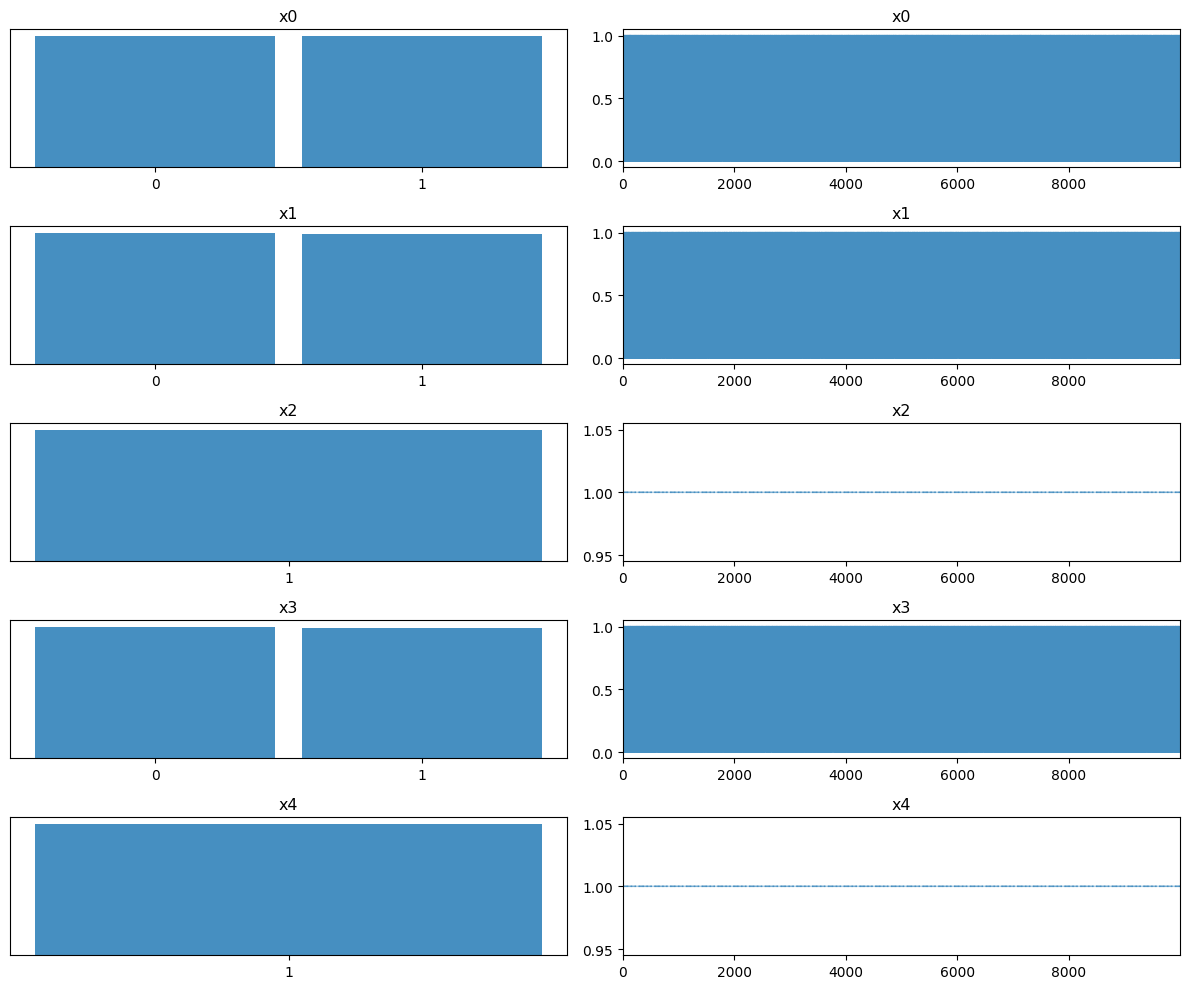

In [24]:
# Plot the posterior
az.plot_trace(trace, var_names=['x0', 'x1', 'x2', 'x3', 'x4']);
plt.savefig('cmsgen_trace_plot_haplotypes.png', dpi=150);

In [25]:
# Diagnostics
az.summary(trace)

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,0.499,0.5,0.0,1.0,0.003,0.002,39305.0,39305.0,1.0
x1,0.498,0.5,0.0,1.0,0.003,0.002,38257.0,38257.0,1.0
x2,1.000,0.0,1.0,1.0,0.000,0.000,40000.0,40000.0,NaN
x3,0.498,0.5,0.0,1.0,0.003,0.002,39503.0,39503.0,1.0
x4,1.000,0.0,1.0,1.0,0.000,0.000,40000.0,40000.0,NaN
...,...,...,...,...,...,...,...,...,...
x995,1.000,0.0,1.0,1.0,0.000,0.000,40000.0,40000.0,NaN
x996,0.501,0.5,0.0,1.0,0.003,0.002,39464.0,39464.0,1.0
x997,0.496,0.5,0.0,1.0,0.003,0.002,39941.0,39941.0,1.0
x998,1.000,0.0,1.0,1.0,0.000,0.000,40000.0,40000.0,NaN


In [26]:
az.to_netcdf(trace, f'haplotypes_SAT_cmsgen_{num_vars}_{num_bits}.nc')

'haplotypes_SAT_cmsgen_200_2.nc'